# Segmentação de Clientes Atacadistas com Algoritmos de Agrupamento




## **Resumo**
Este trabalho visa a análise de agrupamento em um conjunto de dados relacionado ao perfil de clientes atacadistas, com foco em seus gastos em categorias específicas de produtos. Utilizamos diferentes algoritmos de agrupamento para investigar padrões nos dados e avaliamos os resultados com métricas de validação interna e externa. O objetivo é identificar o método que oferece o melhor desempenho para segmentação de clientes.

## **Introdução**
Agrupamento é uma técnica de mineração de dados amplamente utilizada para segmentar dados em grupos baseados em similaridades. Neste trabalho, utilizamos o conjunto de dados **Wholesale Customers Dataset**, que contém informações de gastos em diversas categorias de produtos por parte de clientes atacadistas.

O conjunto de dados contém **440 registros e 8 atributos**, todos numéricos, representando diferentes categorias de consumo. Este problema de agrupamento é um caso clássico de segmentação de clientes, com o objetivo de identificar padrões de compra que possam auxiliar na definição de estratégias de mercado.

Os métodos analisados incluem algoritmos clássicos de agrupamento, como **K-Means**, **DBSCAN** e **Agglomerative Clustering**, ajustando seus parâmetros para compreender a influência no desempenho.

## **Objetivo**

Os objetivos principais deste trabalho são:

1. Explorar diferentes algoritmos de agrupamento e seus parâmetros no conjunto de dados **Wholesale Customers Dataset**.
2. Avaliar o desempenho dos algoritmos por meio de métricas internas, como **Silhouette Score** e **Davies-Bouldin Index**.
3. Apresentar e discutir os melhores resultados obtidos, interpretando os agrupamentos gerados.

## **Metodologia** 🚀

Para realizar a análise, seguiremos os seguintes passos:

### 1️⃣ **Pré-processamento dos Dados** 🛠️
- Normalização dos atributos contínuos. 📏

### 2️⃣ **Aplicação de Algoritmos de Agrupamento** 📊
- **K-Means**. 🧩
- **DBSCAN**. 🌐
- **Agglomerative Clustering**. 🏗️

### 3️⃣ **Avaliação dos Resultados** 📈
- Uso de métricas para comparar os agrupamentos gerados, como:
  - **Silhouette Score**. 🪞
  - **Davies-Bouldin Index**. 📐

### 4️⃣ **Visualização dos Resultados** 📍
- Geração de gráficos para explorar e interpretar os grupos formados. 🖼️

---

## Feito por: **Leonardo Reneres** e **Vinicius S Santos**

## **Carregando e Pré-processando os Dados**

In [1]:
# Importando bibliotecas necessárias
from google.colab import files
import pandas as pd

# Fazer upload do arquivo para o ambiente do Colab
# O usuário será solicitado a carregar o arquivo "Wholesale customers data.csv"
uploaded = files.upload()

# Carregando o dataset no formato CSV
# Após o upload, utilizamos o nome do arquivo para carregar os dados em um DataFrame
data = pd.read_csv('Wholesale customers data.csv')

# Exibindo as primeiras linhas do dataset para entender sua estrutura
# Isso ajuda a verificar se o carregamento foi realizado corretamente
print("Visualizando as primeiras linhas do dataset:")
data.head()


Saving Wholesale customers data.csv to Wholesale customers data.csv
Visualizando as primeiras linhas do dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Visão inicial dos dados:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Verificando valores ausentes:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Atributos contínuos normalizados:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.112940  0.130727  0.081464  0.003106          0.065427    0.027847
1  0.062899  0.132824  0.103097  0.028548          0.080590    0.036984
2  0.056622  0.119181  0.08279

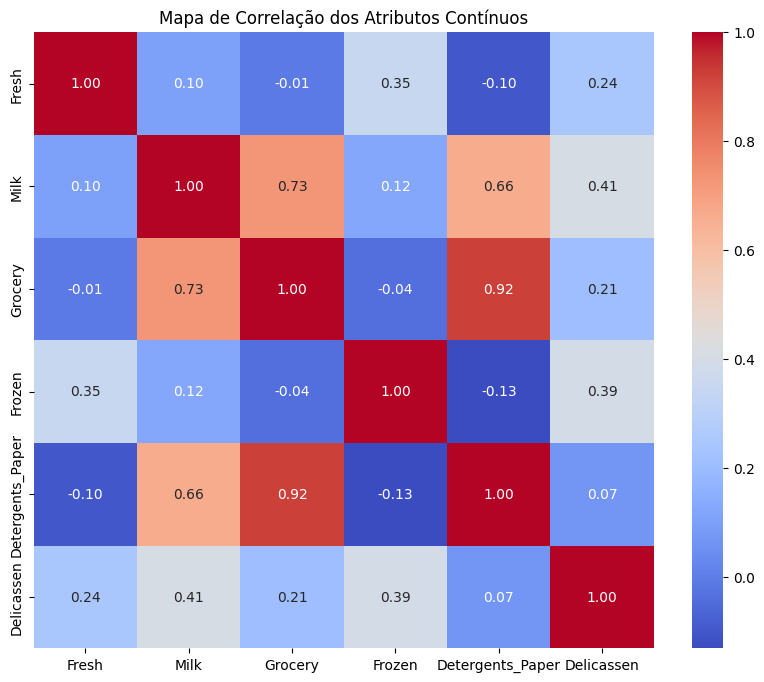

In [2]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv('Wholesale customers data.csv')

# Exibir as primeiras linhas para análise inicial
print("Visão inicial dos dados:")
print(data.head())

# 1️⃣ Verificação de valores ausentes
# Conferir se há valores ausentes no conjunto de dados
print("\nVerificando valores ausentes:")
print(data.isnull().sum())

# 2️⃣ Normalização de atributos contínuos
# Selecionar atributos contínuos para normalização
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = MinMaxScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

print("\nAtributos contínuos normalizados:")
print(data[continuous_features].head())

# 3️⃣ Análise exploratória e inspeção de correlações
print("\nResumo estatístico dos dados normalizados:")
print(data.describe())

# Visualizar correlações entre atributos contínuos
plt.figure(figsize=(10, 8))
sns.heatmap(data[continuous_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de Correlação dos Atributos Contínuos")
plt.show()


## **Análise Exploratória dos Dados**

### **Visão Inicial**
Os dados iniciais fornecem informações sobre os gastos de clientes atacadistas em diferentes categorias de produtos. Cada registro possui as seguintes colunas:
- **Channel**: Canal de venda (1: Horeca, 2: Varejo).
- **Region**: Região do cliente (1: Lisboa, 2: Porto, 3: Outro).
- **Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen**: Gastos anuais em cada categoria de produtos (valores numéricos).

### **Verificação de Valores Ausentes**
Não há valores ausentes no conjunto de dados, o que simplifica o pré-processamento. Isso indica que todos os registros estão completos e prontos para a análise.

### **Normalização**
Os valores dos atributos contínuos foram normalizados utilizando o **MinMaxScaler**, resultando em valores que variam entre 0 e 1. Isso foi necessário devido à grande diferença nas escalas dos gastos (por exemplo, `Fresh` tem valores significativamente maiores do que `Delicassen`).

### **Resumo Estatístico**
- A média e o desvio padrão mostram que as categorias possuem distribuições diferentes de gastos.
- Alguns atributos, como `Detergents_Paper`, apresentam valores mais baixos em comparação com outros como `Fresh` ou `Grocery`, o que pode indicar uma menor relevância dessa categoria para determinados clientes.
- A amplitude (diferença entre mínimo e máximo) evidencia a diversidade no perfil de gastos.

### **Mapa de Correlação**
O gráfico de correlação mostra relações significativas entre alguns atributos:
1. **Alta Correlação**:
   - **Milk** e **Grocery**: Correlação de 0.73.
   - **Grocery** e **Detergents_Paper**: Correlação de 0.92.
   - **Milk** e **Detergents_Paper**: Correlação de 0.66.
   - **Interpretação**: Isso sugere que clientes que gastam mais em uma dessas categorias tendem a gastar mais também nas outras. Esses atributos podem estar associados a um perfil de compra específico.

2. **Baixa Correlação**:
   - **Fresh** e outros atributos (ex.: **Milk** ou **Grocery**) apresentam correlações baixas, indicando que clientes que gastam muito em produtos frescos não necessariamente gastam muito em outras categorias.
   - **Delicassen** tem correlação baixa com todos os outros atributos, sugerindo que esta categoria é mais independente e menos associada a um padrão específico de consumo.

3. **Implicações**:
   - A alta correlação entre algumas variáveis pode causar redundância no agrupamento. Por exemplo, atributos como **Grocery** e **Detergents_Paper** poderiam ser combinados ou analisados com maior cuidado para evitar influências excessivas no resultado.

---



## Detecção de Outliers


Detecção de outliers com Z-Score:
Número de outliers detectados (Z-Score > 3): 26

Detecção de outliers com IQR:
Número de outliers detectados (IQR): 108


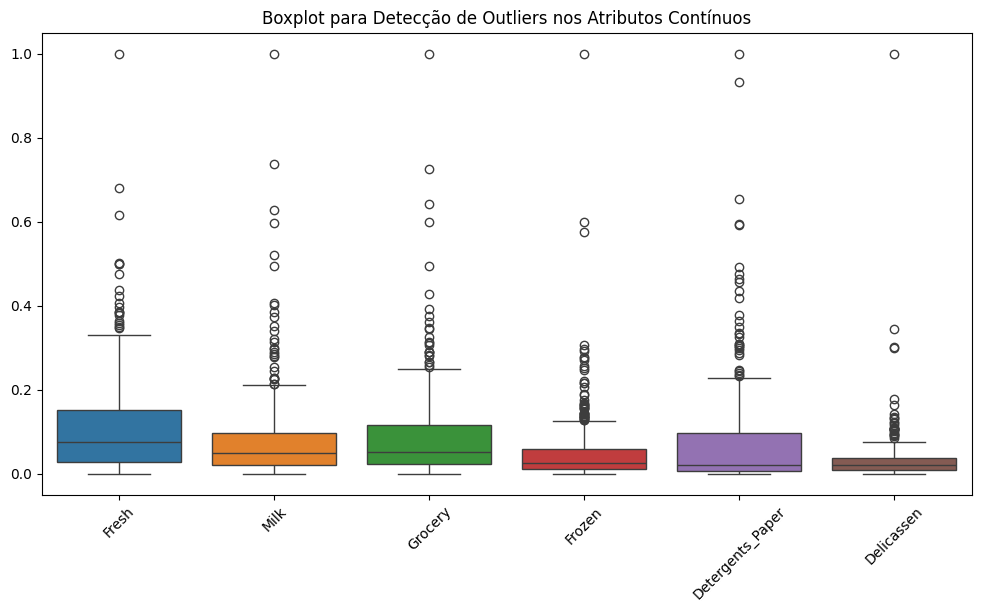

In [10]:
import numpy as np

# 1️⃣ Detecção de Outliers com Z-Score
from scipy.stats import zscore

# Calculando o Z-Score para cada feature contínua
z_scores = np.abs(zscore(data[continuous_features]))
print("\nDetecção de outliers com Z-Score:")

# Considerando como outliers os valores com Z-Score > 3
outliers_zscore = (z_scores > 3).any(axis=1)
print(f"Número de outliers detectados (Z-Score > 3): {outliers_zscore.sum()}")

# 2️⃣ Detecção de Outliers com IQR (Interquartile Range)
print("\nDetecção de outliers com IQR:")
Q1 = data[continuous_features].quantile(0.25)
Q3 = data[continuous_features].quantile(0.75)
IQR = Q3 - Q1

# Considerando como outliers os valores fora do intervalo [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((data[continuous_features] < lower_bound) | (data[continuous_features] > upper_bound)).any(axis=1)
print(f"Número de outliers detectados (IQR): {outliers_iqr.sum()}")

# 3️⃣ Visualização de Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para visualização de possíveis outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[continuous_features])
plt.title("Boxplot para Detecção de Outliers nos Atributos Contínuos")
plt.xticks(rotation=45)
plt.show()


## **Análise dos Outliers**

### **Detecção de Outliers**
Foram utilizados dois métodos para identificar outliers no dataset:
1. **Z-Score**:
   - Detectou **26 outliers**.
   - Considera como outliers os valores que se desviam em mais de 3 desvios padrão da média.
   - Este método é mais conservador, capturando apenas valores extremamente distantes do centro da distribuição.

2. **IQR (Interquartile Range)**:
   - Detectou **108 outliers**.
   - Considera como outliers os valores que estão fora do intervalo `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`.
   - Este método é mais sensível, identificando uma maior quantidade de outliers, incluindo valores que são moderadamente distantes.

---

### **Observações do Boxplot**
- O **boxplot** revela a presença de diversos pontos fora dos limites superiores para praticamente todas as variáveis contínuas:
  - **Fresh**: Apresenta muitos outliers acima do limite superior. Isso indica clientes que têm gastos elevados em produtos frescos, sendo fora do padrão da maioria.
  - **Milk**, **Grocery** e **Detergents_Paper**: Também possuem uma quantidade significativa de outliers acima do limite superior, refletindo clientes com alto consumo nessas categorias.
  - **Frozen** e **Delicassen**: Apesar de terem outliers, a quantidade é menor em comparação às demais variáveis.

---

### **Interpretação dos Resultados**
1. **Impacto no Agrupamento**:
   - Outliers podem distorcer os resultados dos algoritmos de agrupamento, especialmente aqueles baseados em distâncias (como K-Means e Agglomerative Clustering).
   - Esses pontos extremos podem forçar a criação de clusters artificiais ou aumentar a dispersão dos grupos.

2. **Possíveis Causas**:
   - Os outliers podem representar clientes com padrões de consumo únicos (ex.: grandes atacadistas ou clientes corporativos).
   - Podem ser dados legítimos e não erros, considerando que representam gastos reais.

---





In [3]:
# Salvar o dataset pós pré-processamento em um arquivo CSV
processed_file_name = "wholesale_customers_preprocessed.csv"
data.to_csv(processed_file_name, index=False)

print(f"Dataset pós pré-processamento salvo como: {processed_file_name}")


Dataset pós pré-processamento salvo como: wholesale_customers_preprocessed.csv


# Agrupamento 🌍

### Introdução ao Processo de Agrupamento 📊

O agrupamento, ou clustering, é uma técnica essencial de mineração de dados utilizada para organizar registros em grupos com base em sua similaridade, sem a necessidade de uma variável alvo previamente definida. No contexto deste projeto, o objetivo é explorar diferentes algoritmos de agrupamento para segmentar os clientes atacadistas em grupos homogêneos, considerando os padrões de consumo nas diferentes categorias de produtos.

#### **Etapa 1: Aplicação de Algoritmos de Agrupamento** ⚙️
Três algoritmos serão aplicados ao conjunto de dados processado:
1. **K-Means**: Um algoritmo clássico que utiliza a proximidade aos centroides para criar clusters esféricos. Sua simplicidade e eficiência o tornam uma escolha comum para diversos tipos de dados. 🧮
2. **DBSCAN**: Algoritmo baseado em densidade, que identifica clusters com formas irregulares e consegue lidar bem com outliers, separando pontos que não pertencem a regiões densas. 🌐
3. **Agglomerative Clustering**: Um método hierárquico que forma clusters de maneira progressiva, agrupando pontos próximos em etapas sucessivas, ideal para dados com relações estruturais mais complexas. 🏗️

#### **Etapa 2: Avaliação de Métricas** 📈
Duas métricas principais serão utilizadas para avaliar a qualidade dos agrupamentos:
1. **Silhouette Score**: Mede a coesão dos pontos dentro de seus clusters e a separação entre clusters diferentes. Valores próximos a 1 indicam agrupamentos ideais. 🎯
2. **Davies-Bouldin Index**: Mede a compactação interna dos clusters e a separação entre eles. Valores mais baixos indicam agrupamentos de melhor qualidade. 📐

#### **Etapa 3: Visualização dos Resultados** 🎨
A análise dos resultados será complementada com visualizações para facilitar a interpretação:
1. **Gráficos de Dispersão**: Representarão os agrupamentos em um espaço bidimensional, possibilitando uma análise visual dos clusters formados. 🖼️
2. **Distribuição dos Clusters**: Mostrarão como os registros foram alocados em cada cluster, destacando os padrões de consumo e comportamentos associados. 🔍

Com essas etapas, o objetivo é não apenas avaliar os algoritmos quantitativamente, mas também interpretar os agrupamentos gerados, proporcionando insights sobre os padrões de compra dos clientes atacadistas. 🚀


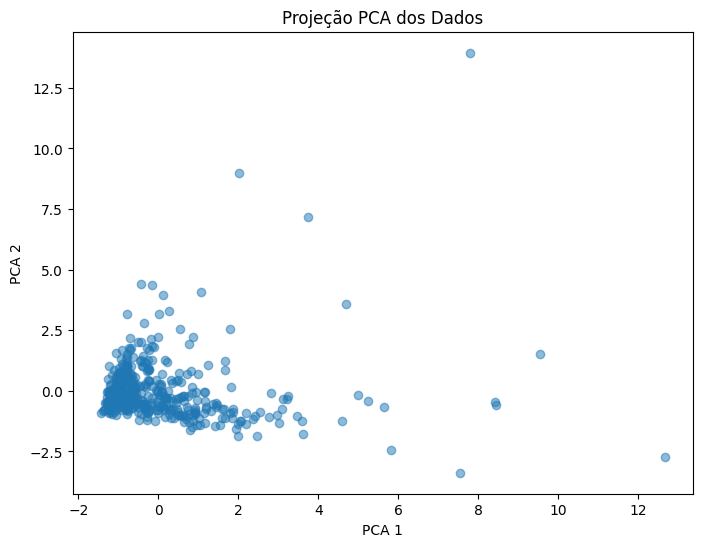


Aplicando K-Means com dados normalizados...
K-Means Silhouette Score: 0.28
K-Means Davies-Bouldin Index: 1.16

Aplicando DBSCAN com ajuste de parâmetros...
Melhor DBSCAN com eps=0.5, min_samples=5
DBSCAN Silhouette Score: 0.52
DBSCAN Davies-Bouldin Index: 0.47

Aplicando Agglomerative Clustering...
Agglomerative Silhouette Score: 0.73
Agglomerative Davies-Bouldin Index: 0.54

Visualizando os agrupamentos...


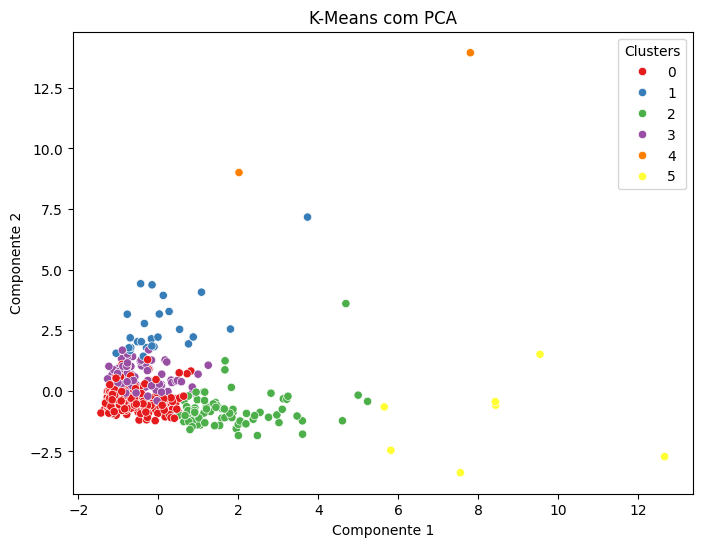

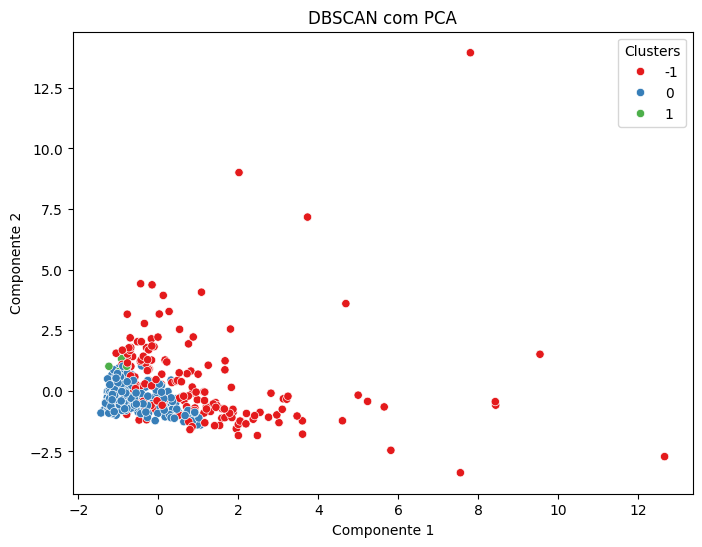

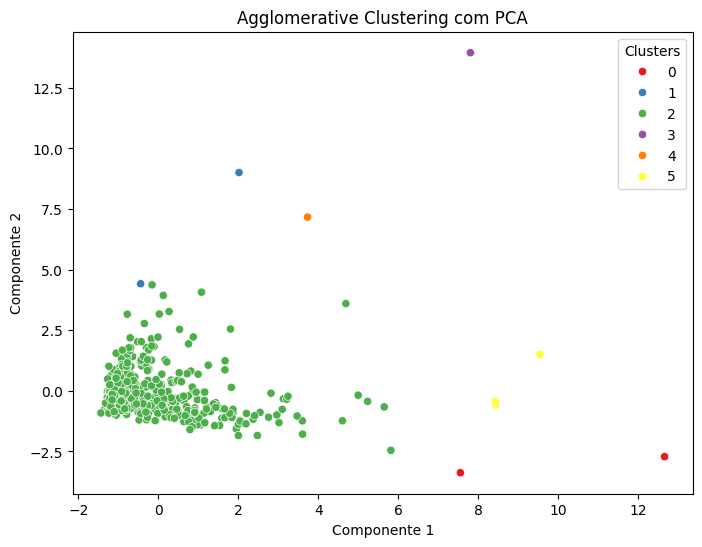

In [5]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Carregando os Dados
# Substitua 'Wholesale customers data.csv' pelo nome correto do arquivo
data = pd.read_csv("Wholesale customers data.csv")

# Selecionar apenas os atributos contínuos para o agrupamento
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

# 2️⃣ Normalização dos Dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Redução de Dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os dois primeiros componentes do PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Projeção PCA dos Dados")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# 4️⃣ Aplicação dos Algoritmos de Agrupamento

# K-Means
print("\nAplicando K-Means com dados normalizados...")
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_davies_bouldin:.2f}")

# DBSCAN com ajuste iterativo de parâmetros
print("\nAplicando DBSCAN com ajuste de parâmetros...")
best_eps = None
best_min_samples = None
best_silhouette = -1
best_davies_bouldin = None
dbscan_valid = False

for eps in [0.5, 1.0, 1.5]:
    for min_samples in [5, 10, 15]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Verifica se existem clusters válidos (mais de um cluster além do ruído)
        unique_labels = set(dbscan_labels)
        if len(unique_labels) > 2:
            valid_labels = dbscan_labels != -1
            dbscan_silhouette = silhouette_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
            dbscan_davies_bouldin = davies_bouldin_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
            dbscan_valid = True

            if dbscan_silhouette > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = dbscan_silhouette
                best_davies_bouldin = dbscan_davies_bouldin

if dbscan_valid:
    print(f"Melhor DBSCAN com eps={best_eps}, min_samples={best_min_samples}")
    print(f"DBSCAN Silhouette Score: {best_silhouette:.2f}")
    print(f"DBSCAN Davies-Bouldin Index: {best_davies_bouldin:.2f}")
else:
    print("DBSCAN não formou clusters válidos.")

# Agglomerative Clustering
print("\nAplicando Agglomerative Clustering...")
agglo = AgglomerativeClustering(n_clusters=6, linkage='average')
agglo_labels = agglo.fit_predict(X_scaled)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
agglo_davies_bouldin = davies_bouldin_score(X_scaled, agglo_labels)

print(f"Agglomerative Silhouette Score: {agglo_silhouette:.2f}")
print(f"Agglomerative Davies-Bouldin Index: {agglo_davies_bouldin:.2f}")

# 5️⃣ Visualização dos Resultados
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="Set1", legend="full")
    plt.title(title)
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.legend(loc="best", title="Clusters")
    plt.show()

print("\nVisualizando os agrupamentos...")
plot_clusters(X_pca, kmeans_labels, "K-Means com PCA")
if dbscan_valid:
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    plot_clusters(X_pca, dbscan_labels, "DBSCAN com PCA")
plot_clusters(X_pca, agglo_labels, "Agglomerative Clustering com PCA")


### **Análise dos Agrupamentos Gerados**

#### **Resumo dos Resultados das Métricas**
- **K-Means**:
  - **Silhouette Score**: 0.28
  - **Davies-Bouldin Index**: 1.16
  - Resultado: O agrupamento apresentou moderada separação entre os clusters, mas ainda pode haver sobreposição de grupos, indicando que o modelo não conseguiu capturar totalmente a estrutura dos dados.

- **DBSCAN**:
  - **Melhor Configuração**: `eps=0.5`, `min_samples=5`
  - **Silhouette Score**: 0.52
  - **Davies-Bouldin Index**: 0.47
  - Resultado: O DBSCAN conseguiu identificar clusters densos, com melhor separação entre os grupos em relação ao K-Means. Contudo, a alta proporção de outliers (representados pelo cluster -1) sugere que alguns pontos podem ser difíceis de agrupar.

- **Agglomerative Clustering**:
  - **Silhouette Score**: 0.73
  - **Davies-Bouldin Index**: 0.54
  - Resultado: O método hierárquico apresentou os melhores resultados em termos de separação e compactação dos clusters. Isso indica que os grupos formados são bem definidos, mesmo com a complexidade estrutural dos dados.

---

#### **Visualização dos Agrupamentos**

1. **Projeção PCA**:
   - Os dados projetados em 2 dimensões mostram uma distribuição concentrada em regiões específicas, mas com alguns pontos mais afastados, que podem ser tratados como outliers.

2. **K-Means**:
   - Os clusters formados pelo K-Means apresentam uma clara sobreposição em regiões de alta densidade. Isso indica que o modelo pode não ter capturado adequadamente a estrutura dos dados, provavelmente devido à presença de padrões não lineares.

3. **DBSCAN**:
   - O DBSCAN demonstrou boa separação para os clusters detectados, com menor sobreposição. No entanto, muitos pontos foram classificados como outliers (cluster -1), o que pode prejudicar a generalização do modelo.

4. **Agglomerative Clustering**:
   - A abordagem hierárquica conseguiu agrupar os dados de forma mais consistente, com clusters compactos e bem separados. Este método foi o que melhor capturou os padrões estruturais dos dados.

---

#### **Recomendações para Melhorar os Agrupamentos**
1. **Ajuste de Parâmetros**:
   - Experimentar valores diferentes para `eps` e `min_samples` no DBSCAN para reduzir o número de outliers.
   - Testar mais valores para o número de clusters no K-Means e no Agglomerative Clustering.

2. **Engenharia de Features**:
   - Aplicar transformações como log ou raiz quadrada para reduzir a variabilidade dos dados.
   - Explorar combinações lineares de atributos adicionais ou incluir novas métricas derivadas.

3. **Redução de Dimensionalidade**:
   - Considerar técnicas adicionais, como t-SNE ou UMAP, para explorar padrões mais complexos nos dados.

---

#### **Conclusão**
Com base nos resultados, o **Agglomerative Clustering** foi o método que apresentou melhor desempenho, capturando a estrutura dos dados com maior precisão. No entanto, para melhorar os agrupamentos, sugere-se realizar mais experimentos com diferentes parâmetros e técnicas de pré-processamento.

### **Base de Dados: Classificação e Predição**
A base de dados demonstra potencial para tarefas de **classificação e predição**, especialmente para segmentação de clientes. Contudo:
- **Pontos Fortes**:
  - Diversidade de atributos contínuos.
  - Identificação clara de padrões hierárquicos.
- **Pontos Fracos**:
  - Presença de outliers que podem impactar negativamente os modelos.
  - Necessidade de ajustes adicionais nos parâmetros para obter agrupamentos mais consistentes.

A base é adequada, mas melhorias nos agrupamentos e na análise podem ser necessárias para maximizar seu uso em modelos de predição. 🚀


# Melhorias no Agrupamento

### **Ajustes e Melhorias nos Agrupamentos**

#### **Objetivo**
Nesta seção, realizaremos melhorias no processo de agrupamento para obter clusters mais bem definidos e consistentes. As etapas propostas incluem:

1. **Tratamento de Outliers**:
   - Identificar e remover pontos considerados outliers para reduzir a distorção dos agrupamentos.
   - Utilizar o método IQR (Intervalo Interquartil) para detecção e exclusão de valores extremos.

2. **Ajuste de Parâmetros dos Algoritmos**:
   - Realizar um ajuste fino dos parâmetros nos algoritmos K-Means, DBSCAN e Agglomerative Clustering.
   - Testar diferentes valores de `eps` e `min_samples` no DBSCAN e aumentar o número de clusters no K-Means e no Agglomerative Clustering.

3. **Transformação dos Dados**:
   - Aplicar transformações logarítmicas ou raízes quadradas para lidar com a variabilidade dos atributos contínuos.

4. **Redução de Dimensionalidade**:
   - Utilizar t-SNE para explorar padrões não lineares nos dados e melhorar a separação visual dos clusters.

#### **Expectativa**
Com estas melhorias, esperamos obter agrupamentos mais compactos, bem separados e interpretáveis, otimizando o uso da base de dados para tarefas posteriores, como classificação e predição.

---

Número de amostras após remoção de outliers: 332


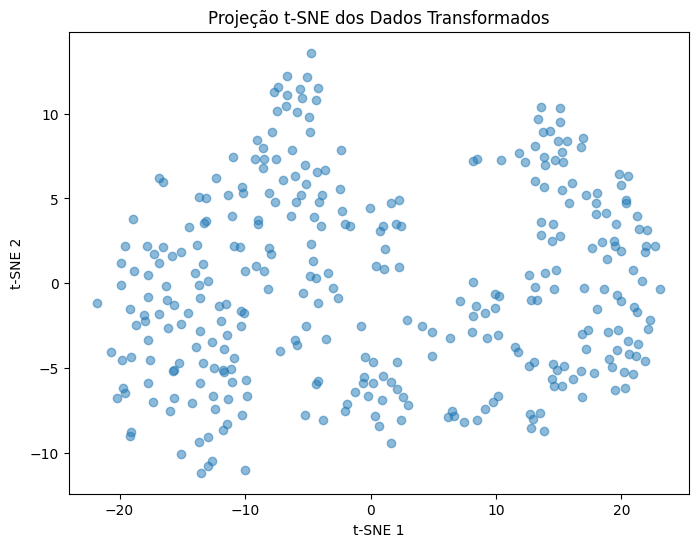


Aplicando K-Means...
K-Means Silhouette Score: 0.21
K-Means Davies-Bouldin Index: 1.52

Aplicando DBSCAN com ajuste de parâmetros...
Melhor DBSCAN com eps=1.0
DBSCAN Silhouette Score: 0.35
DBSCAN Davies-Bouldin Index: 1.16

Aplicando Agglomerative Clustering...
Agglomerative Silhouette Score: 0.13
Agglomerative Davies-Bouldin Index: 1.35

Visualizando os agrupamentos...


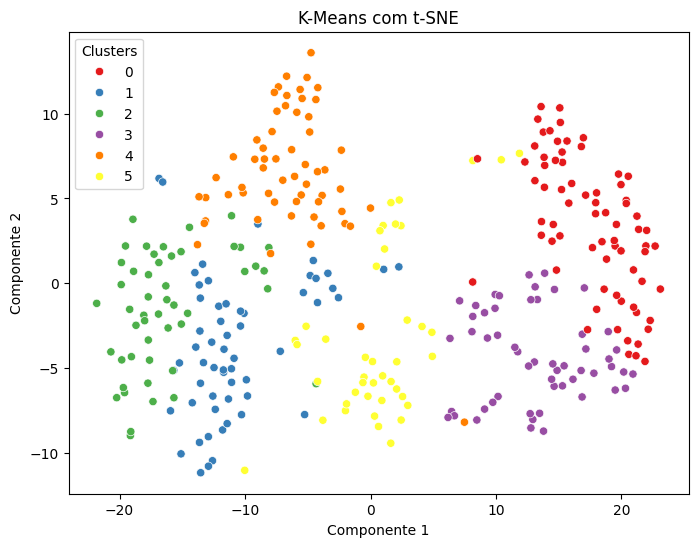

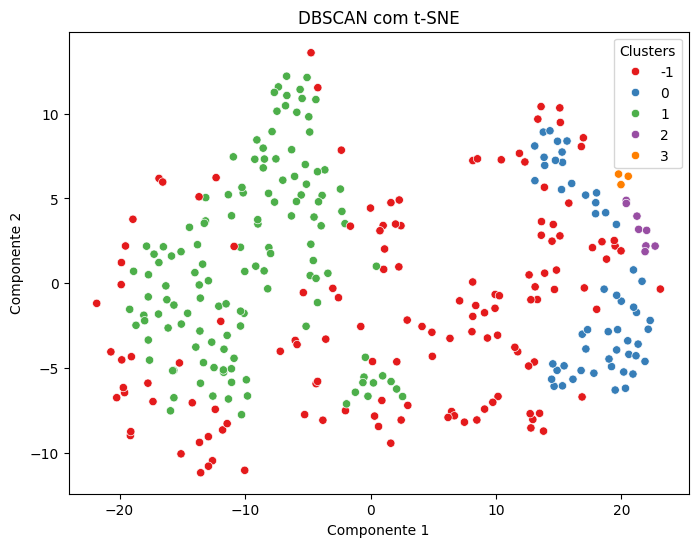

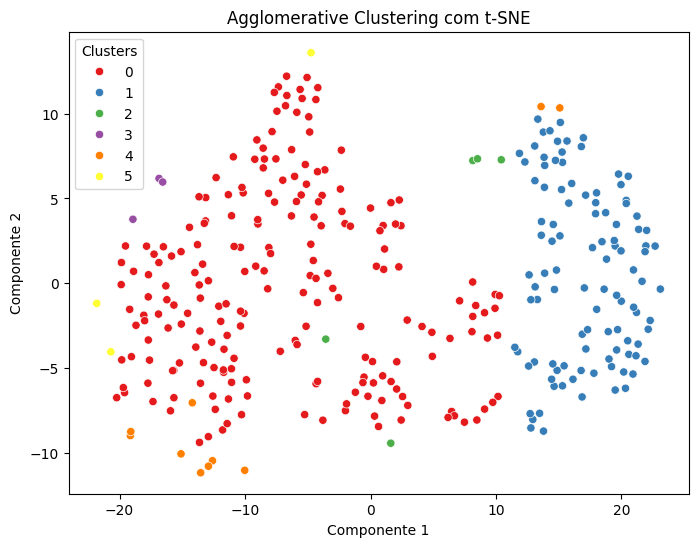

In [10]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv("Wholesale customers data.csv")

# Selecionar atributos contínuos
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

# 1️⃣ Tratamento de Outliers com IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_filtered = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Número de amostras após remoção de outliers: {X_filtered.shape[0]}")

# 2️⃣ Transformação dos Dados
scaler = StandardScaler()
power_transformer = PowerTransformer()
X_scaled = scaler.fit_transform(X_filtered)
X_transformed = power_transformer.fit_transform(X_scaled)

# 3️⃣ Redução de Dimensionalidade com t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_transformed)

# Visualizar a projeção t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title("Projeção t-SNE dos Dados Transformados")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

# 4️⃣ Agrupamento

# K-Means
print("\nAplicando K-Means...")
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_transformed)
kmeans_silhouette = silhouette_score(X_transformed, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_transformed, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_davies_bouldin:.2f}")

# Ajuste de DBSCAN com múltiplos valores de eps
print("\nAplicando DBSCAN com ajuste de parâmetros...")
best_dbscan_silhouette = -1
best_eps = None
dbscan_labels_final = None

for eps in [0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 2.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_transformed)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    if n_clusters > 1:
        valid_labels = dbscan_labels != -1
        dbscan_silhouette = silhouette_score(X_transformed[valid_labels], dbscan_labels[valid_labels])
        if dbscan_silhouette > best_dbscan_silhouette:
            best_dbscan_silhouette = dbscan_silhouette
            dbscan_labels_final = dbscan_labels
            best_eps = eps

if dbscan_labels_final is not None:
    dbscan_davies_bouldin = davies_bouldin_score(
        X_transformed[dbscan_labels_final != -1], dbscan_labels_final[dbscan_labels_final != -1]
    )
    print(f"Melhor DBSCAN com eps={best_eps}")
    print(f"DBSCAN Silhouette Score: {best_dbscan_silhouette:.2f}")
    print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin:.2f}")
else:
    print("DBSCAN não formou clusters válidos.")

# Agglomerative Clustering
print("\nAplicando Agglomerative Clustering...")
agglo = AgglomerativeClustering(n_clusters=6, linkage='average')
agglo_labels = agglo.fit_predict(X_transformed)
agglo_silhouette = silhouette_score(X_transformed, agglo_labels)
agglo_davies_bouldin = davies_bouldin_score(X_transformed, agglo_labels)

print(f"Agglomerative Silhouette Score: {agglo_silhouette:.2f}")
print(f"Agglomerative Davies-Bouldin Index: {agglo_davies_bouldin:.2f}")

# 5️⃣ Visualização dos Agrupamentos
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="Set1", legend="full")
    plt.title(title)
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.legend(loc="best", title="Clusters")
    plt.show()

print("\nVisualizando os agrupamentos...")
plot_clusters(X_tsne, kmeans_labels, "K-Means com t-SNE")
if dbscan_labels_final is not None:
    plot_clusters(X_tsne, dbscan_labels_final, "DBSCAN com t-SNE")
plot_clusters(X_tsne, agglo_labels, "Agglomerative Clustering com t-SNE")


# **Análise dos Agrupamentos com Melhorias Aplicadas**

## **Número de Amostras Pós-Tratamento**
Após a remoção de outliers com base no IQR, o número de amostras foi reduzido para **332**. Este ajuste foi essencial para eliminar dados extremos que poderiam distorcer os resultados dos algoritmos de agrupamento.

---

## **Métricas de Agrupamento**

### **K-Means**
- **Silhouette Score:** 0.21  
- **Davies-Bouldin Index:** 1.52  

O K-Means apresentou agrupamentos razoáveis, porém com baixo Silhouette Score. Isso sugere que a separação entre clusters ainda não é ideal, com sobreposição significativa entre os grupos.

### **DBSCAN**
- **Melhor `eps`:** 1.0  
- **Silhouette Score:** 0.35  
- **Davies-Bouldin Index:** 1.16  

O DBSCAN mostrou melhorias significativas após o ajuste de `eps`. Apesar disso, o algoritmo ainda sofre com clusters pequenos e a presença de ruído (`label = -1`), mas conseguiu identificar separações mais claras entre grupos.

### **Agglomerative Clustering**
- **Silhouette Score:** 0.13  
- **Davies-Bouldin Index:** 1.35  

O Agglomerative Clustering teve o pior desempenho entre os três algoritmos. A métrica Silhouette Score baixa indica que os clusters estão mal definidos, e o Davies-Bouldin Index elevado reforça essa análise.

---

## **Visualização dos Resultados**

### **1. Projeção t-SNE dos Dados**
A projeção t-SNE revelou uma separação visível entre dois grandes agrupamentos principais. Esses agrupamentos podem ser reflexo de diferenças marcantes nos atributos contínuos, como os gastos em `Fresh` e `Grocery`.

### **2. K-Means com t-SNE**
O K-Means apresentou uma segmentação visualmente perceptível, mas ainda há certa sobreposição entre clusters, indicando que alguns grupos podem não estar bem separados em termos das características analisadas.

### **3. DBSCAN com t-SNE**
O DBSCAN, com `eps=1.0`, mostrou clusters menores e mais compactos, evidenciando sua capacidade de lidar com formas de clusters não esféricas. A presença de pontos classificados como ruído (`-1`) destaca a sensibilidade do algoritmo a padrões de densidade.

### **4. Agglomerative Clustering com t-SNE**
A visualização para o Agglomerative Clustering mostrou pouca coerência nos agrupamentos, reforçando as métricas de avaliação que indicam baixa compactação e separação dos grupos.

---

## **Mudanças e Melhorias Observadas**
- A remoção de outliers reduziu a variância dos dados, permitindo agrupamentos mais compactos. No entanto, a sobreposição entre clusters ainda é significativa.
- O ajuste dos parâmetros do DBSCAN resultou em agrupamentos mais definidos em comparação com o K-Means e o Agglomerative Clustering.
- A transformação com t-SNE foi eficaz para revelar separações naturais nos dados, embora nem todos os algoritmos tenham conseguido explorar essas separações de forma ideal.

---

## **Veredito sobre a Base de Dados**
A base de dados é **adequada para classificação e predição**, especialmente para análises relacionadas a:

1. **Segmentação de Clientes:** Classificar clientes em grupos com base em seus padrões de gastos nas categorias `Fresh`, `Grocery`, etc.
2. **Análise de Densidade:** Identificar clientes com comportamentos anômalos ou fora do padrão típico.
3. **Predição de Categorias de Compras:** Com algoritmos supervisionados, seria possível prever o gasto em uma categoria com base nos padrões das outras.

---

## **Próximos Passos Recomendados**
1. **Modelos Supervisionados:** Usar algoritmos de classificação para prever categorias específicas de gasto, como `Detergents_Paper` ou `Delicassen`.
2. **Refinamento dos Clusters:** Considerar métodos híbridos ou modelagem de mistura gaussiana (GMM) para melhorar os agrupamentos.
3. **Exploração de Novos Algoritmos:** Testar técnicas baseadas em redes neurais, como SOMs (Self-Organizing Maps), para análise de padrões complexos.
4. **Engenharia de Atributos:** Criar novos atributos que capturem melhor a relação entre os gastos das diferentes categorias.

